In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import integrate 
from mpl_toolkits.mplot3d import Axes3D

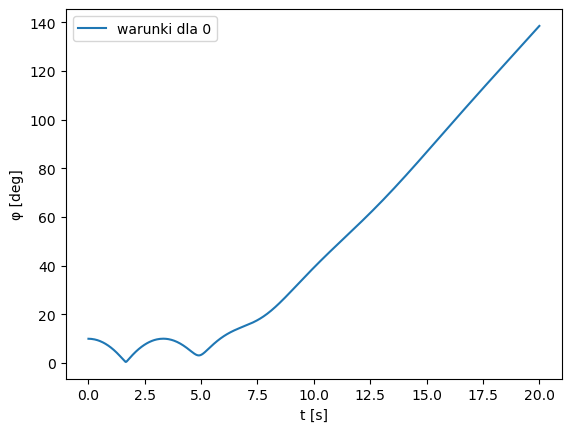

In [2]:
# s0 polozenie katowe
# s1 polozenie w z 
# s2 predkosc katowa
# s3 predkosc w z 

#Dane

alfa = 0.5
g = 9.81


s0 = [np.pi/0.99]
s1 = [10]
s2 = [0]
s3 = [0]


def fun(t, tabs):
    #print(tabs)
    k1 = tabs[2]
    k2 = tabs[3]
    k3 = -g*(np.cos(alfa)**2/np.sin(alfa))*(np.sin(tabs[0])/tabs[1]) - 2*tabs[2]*tabs[3]/tabs[1]
    k4 = np.sin(alfa)**2*tabs[1]*tabs[2]**2 - g*np.sin(alfa)*np.cos(alfa)**2*(1 - np.cos(tabs[0]))
    
    return k1, k2, k3, k4 



for j in range(np.size(s0)):
    solution = integrate.RK45(fun, 0, [s0[j], s1[j], s2[j], s3[j]], 20, rtol=1e-10, atol=1e-10)

    # Zbieranie danych
    t_values = []
    s0_values = []
    s1_values = []
    s2_values = []
    s3_values = []

    for i in range(1000):
        solution.step()
        t_values.append(solution.t)
        s0_values.append(solution.y[0])
        s1_values.append(solution.y[1])
        s2_values.append(solution.y[2])
        s3_values.append(solution.y[3])
  
        if solution.status == 'finished':
            break
    plt.plot(t_values, s1_values, label="warunki dla "+str(j))
    plt.xlabel("t [s]")
    plt.ylabel("φ [deg]")
    plt.rcParams["figure.figsize"] = (10, 10)
    
plt.legend()

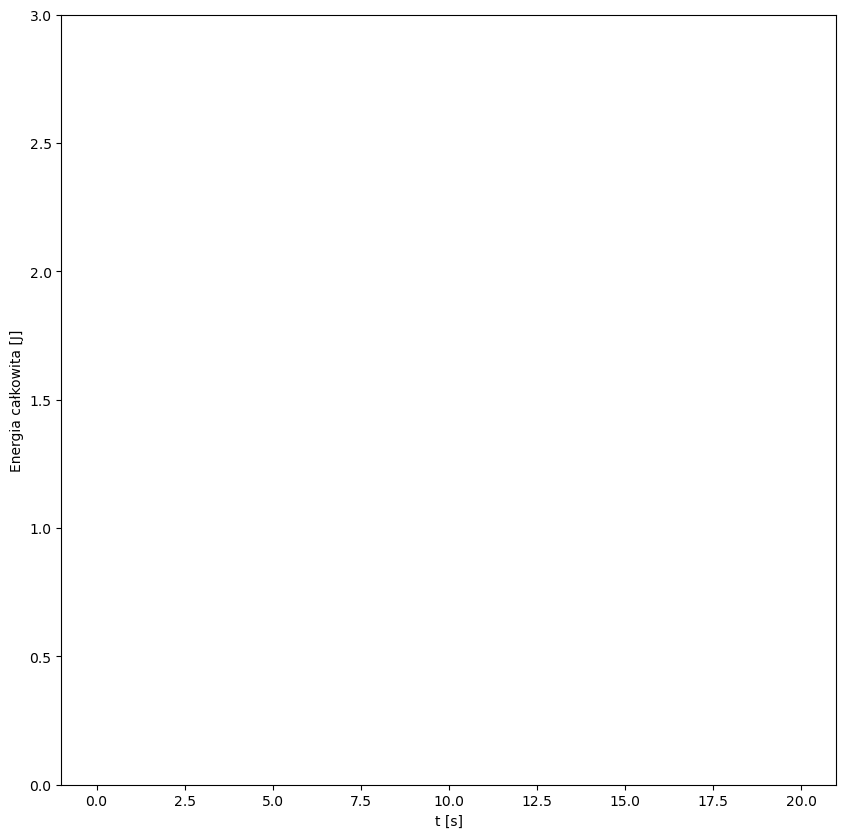

In [4]:
E = np.zeros(np.size(s0_values))
for i in range(np.size(E)):
    E[i] = (1/2)*(np.tan(alfa)**2*s1_values[i]**2*s2_values[i]**2 + (s3_values[i]**2)/(np.cos(alfa)**2)) + g*s1_values[i]*np.sin(alfa)*(1-np.cos(s0_values[i]))
#print(E)
plt.plot(t_values, E)
plt.xlabel("t [s]")
plt.ylabel("Energia całkowita [J]")
plt.ylim(ymax = 3, ymin = 0)
plt.rcParams["figure.figsize"] = (10,10)

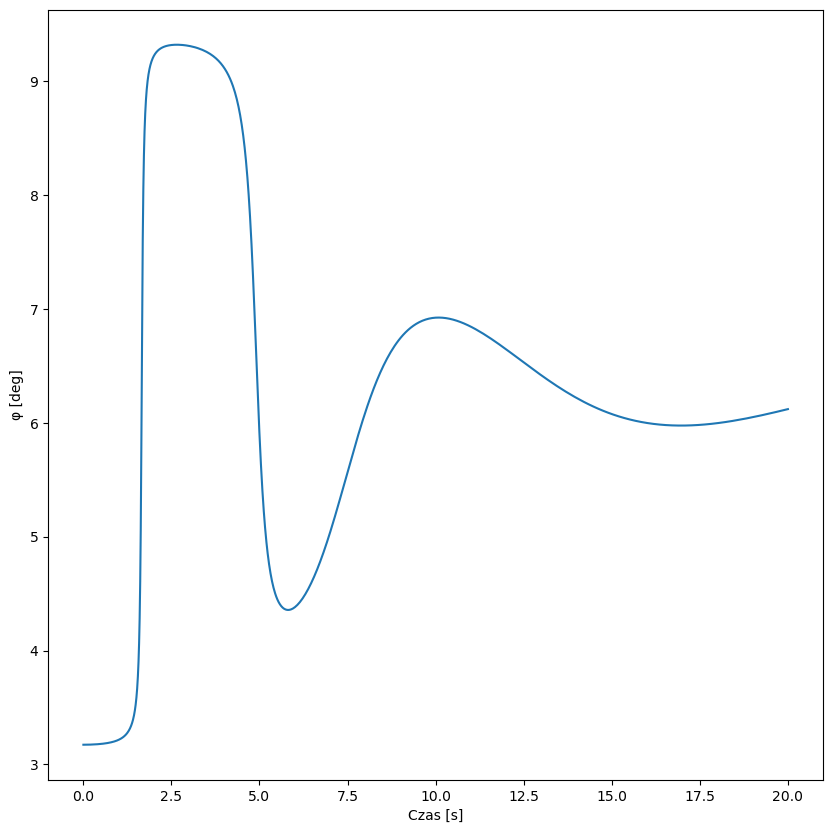

In [5]:
plt.plot(t_values, s0_values)
plt.xlabel("Czas [s]")
plt.ylabel("φ [deg]")
plt.rcParams["figure.figsize"] = (10,10)

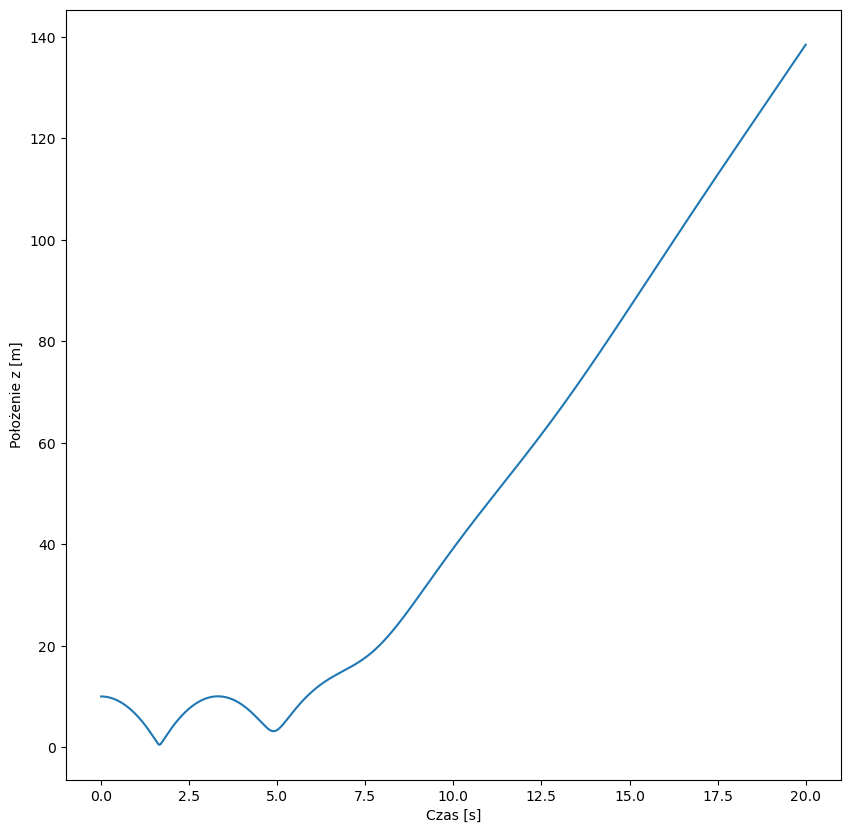

In [6]:
plt.plot(t_values, s1_values)
plt.xlabel("Czas [s]")
plt.ylabel("Położenie z [m]")
plt.rcParams["figure.figsize"] = (10,10)

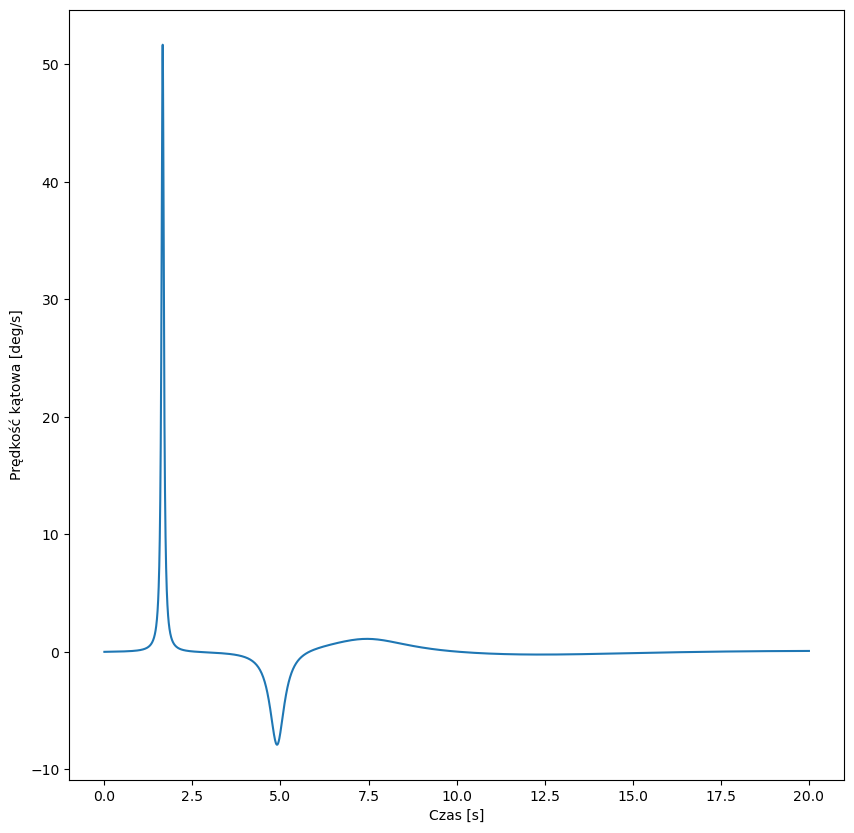

In [7]:
plt.plot(t_values, s2_values)
plt.xlabel("Czas [s]")
plt.ylabel("Prędkość kątowa [deg/s]")
plt.rcParams["figure.figsize"] = (10,10)

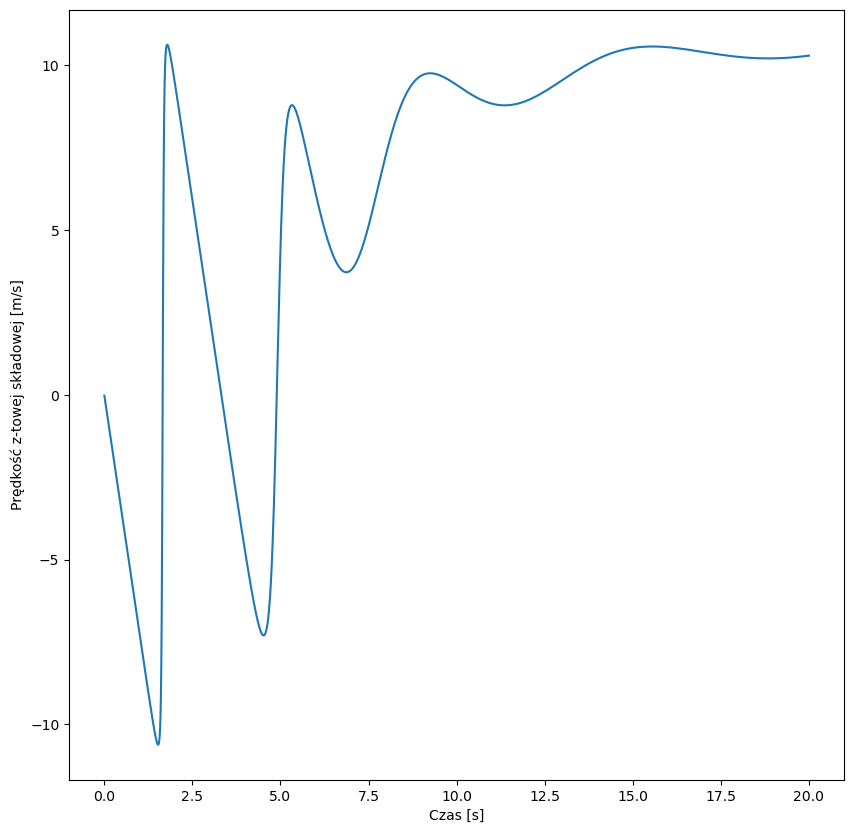

In [8]:
plt.plot(t_values, s3_values)
plt.xlabel("Czas [s]")
plt.ylabel("Prędkość z-towej składowej [m/s]")
plt.rcParams["figure.figsize"] = (10,10)

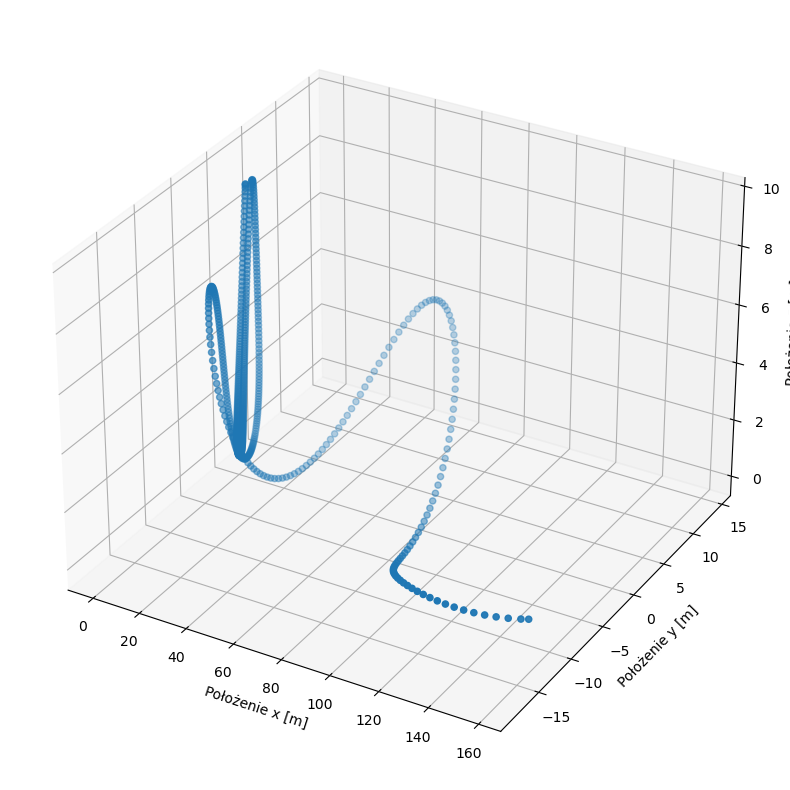

In [9]:
#Konwersja do Laboratyjnego ukladu

rho = np.zeros(np.size(s1_values))

x = np.zeros(np.size(rho))
y = np.zeros(np.size(rho))
z = np.zeros(np.size(rho))

for i in range(np.size(s1_values)):
    rho[i] = s1_values[i]*np.tan(alfa)
    
for i in range(np.size(rho)):
    x[i] = rho[i]*np.cos(s0_values[i])
    y[i] = rho[i]*np.sin(s0_values[i])
    z[i] = s1_values[i]

Theta = np.pi/2 - alfa

x_prim = np.zeros(np.size(x))
y_prim = np.zeros(np.size(y))
z_prim = np.zeros(np.size(z))



x_prim[:] = x[:]*np.cos(Theta)+ z[:]*np.sin(Theta)
y_prim[:] = y[:]
z_prim[:] = -x[:]*np.sin(Theta) + z[:]*np.cos(Theta)
#x_prim

# Plotowanie 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Położenie x [m]')
ax.set_ylabel('Położenie y [m]')
ax.set_zlabel('Położenie z [m]')
ax.scatter(x_prim, y_prim, z_prim)

plt.show()

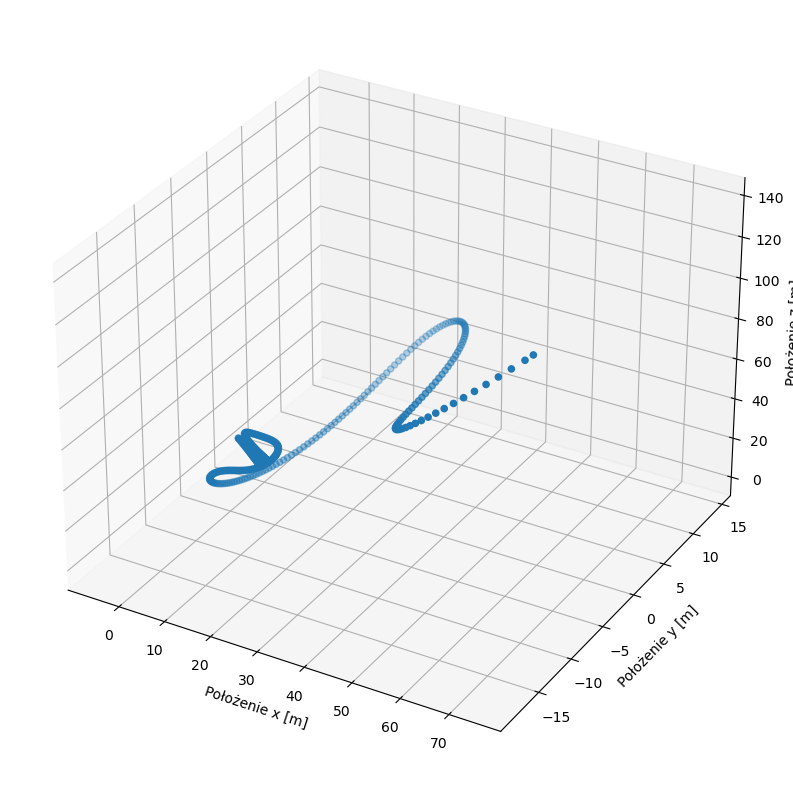

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Położenie x [m]')
ax.set_ylabel('Położenie y [m]')
ax.set_zlabel('Położenie z [m]')
ax.scatter(x, y, z)

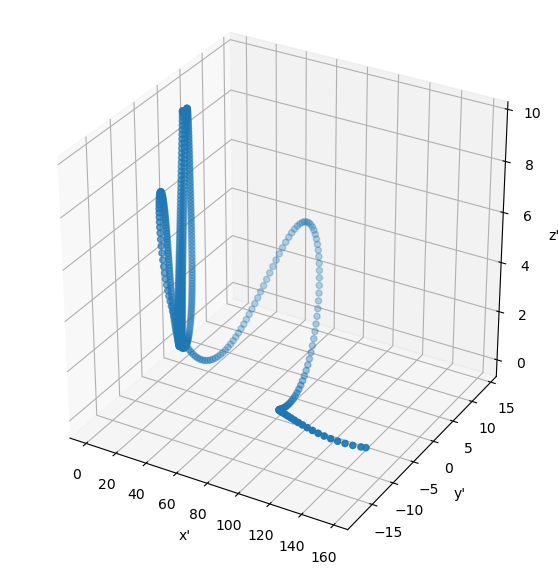

In [34]:

fig = plt.figure(figsize=(7, 7))  # Ustawienie większego rozmiaru figury
ax = fig.add_subplot(111, projection='3d')

# Wygenerowanie wykresu 3D
ax.scatter(x_prim, y_prim, z_prim)

# Ustawienie etykiet osi
ax.set_xlabel('x\'')
ax.set_ylabel('y\'')
ax.set_zlabel('z\'')

# Dostosowanie proporcji osi
ax.set_box_aspect([1, 1, 1])  # Proporcje osi x, y, z są równe

# Wyświetlenie wykresu
plt.show()

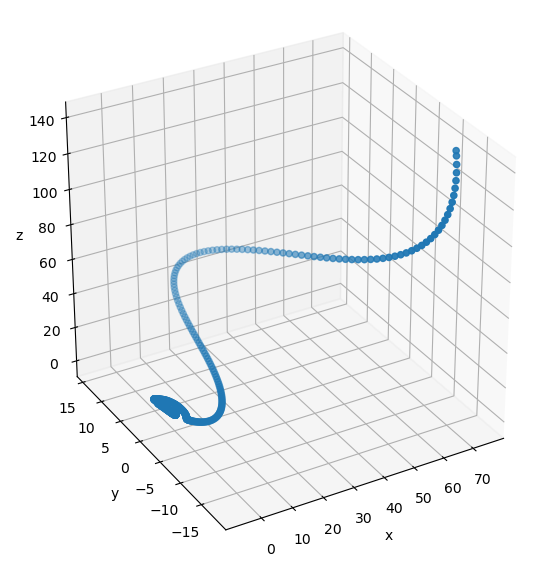

In [35]:
# Inicjalizacja wykresu 3D
fig = plt.figure(figsize=(7, 7))  # Ustawienie większego rozmiaru figury
ax = fig.add_subplot(111, projection='3d')

# Wygenerowanie wykresu 3D z inną perspektywą
ax.scatter(x,y,z)

# Ustawienie perspektywy rzutu z innej strony
ax.view_init(elev=30, azim=-120)  # Zmiana elev (elevation) i azim (azimuth)

# Ustawienie etykiet osi
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

# Dostosowanie proporcji osi
ax.set_box_aspect([1, 1, 1])  # Proporcje osi x, y, z są równe

# Wyświetlenie wykresu
plt.show()

In [21]:
Macierz = np.array([[np.cos(Theta), 0, np.sin(Theta)], [0, 1, 0], [-np.sin(Theta), 0, np.cos(Theta)]], dtype=float)
Wektor = np.array([x, y, z])
x_prim1, y_prim1, z_prim1 = Macierz @ Wektor
#x_prim1

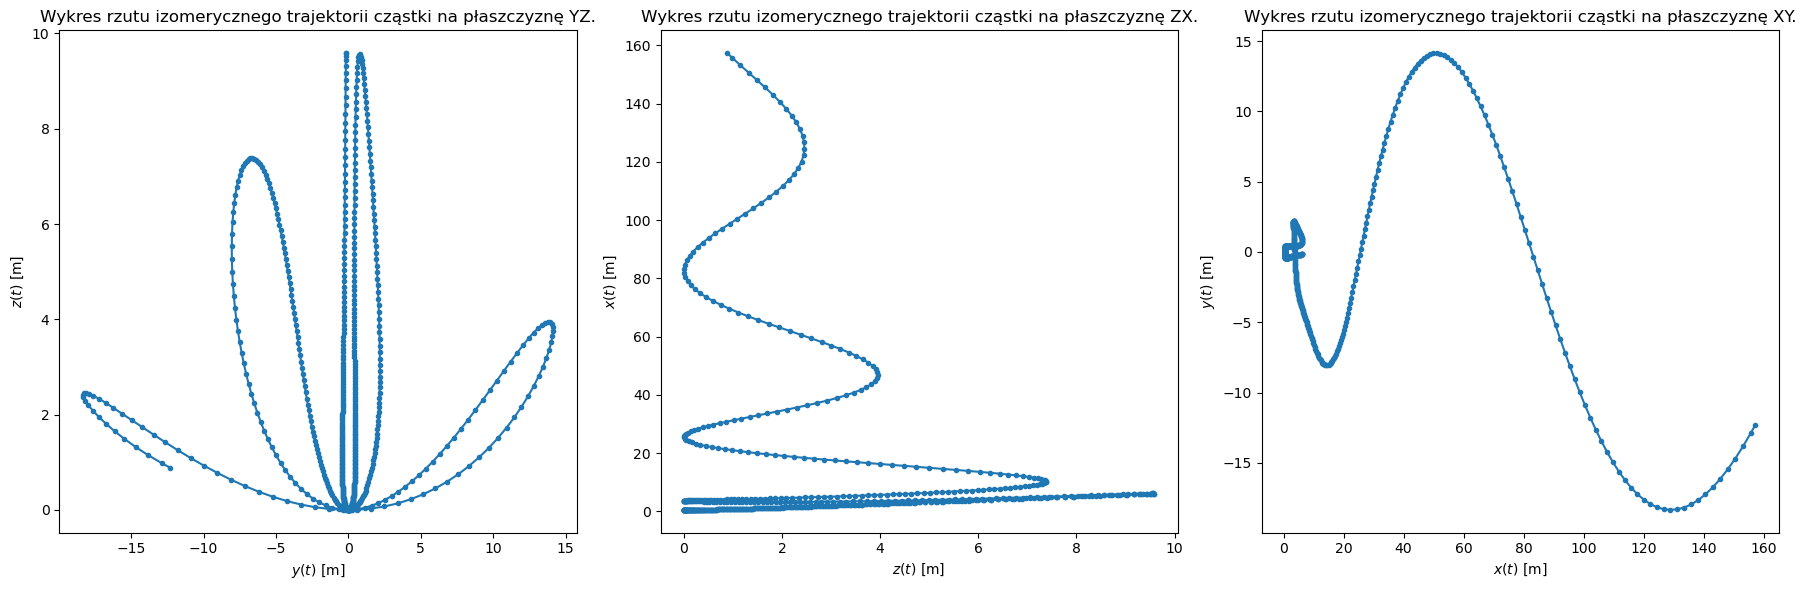

In [22]:
# Ustawienia podziału na subploty
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Wykres 1
axs[0].plot(y_prim, z_prim, marker='.')
axs[0].set_xlabel('$y(t)$ [m]')
axs[0].set_ylabel('$z(t)$ [m]')
axs[0].set_title('Wykres rzutu izomerycznego trajektorii cząstki na płaszczyznę YZ.')

# Wykres 2
axs[1].plot(z_prim,x_prim, marker='.')
axs[1].set_xlabel('$z(t)$ [m]')
axs[1].set_ylabel('$x(t)$ [m]')
axs[1].set_title('Wykres rzutu izomerycznego trajektorii cząstki na płaszczyznę ZX.')

# Wykres 3
axs[2].plot(x_prim, y_prim, marker='.')
axs[2].set_xlabel('$x(t)$ [m]')
axs[2].set_ylabel('$y(t)$ [m]')
axs[2].set_title('Wykres rzutu izomerycznego trajektorii cząstki na płaszczyznę XY.')

plt.tight_layout()  # Dopasowanie subplotów
plt.show()

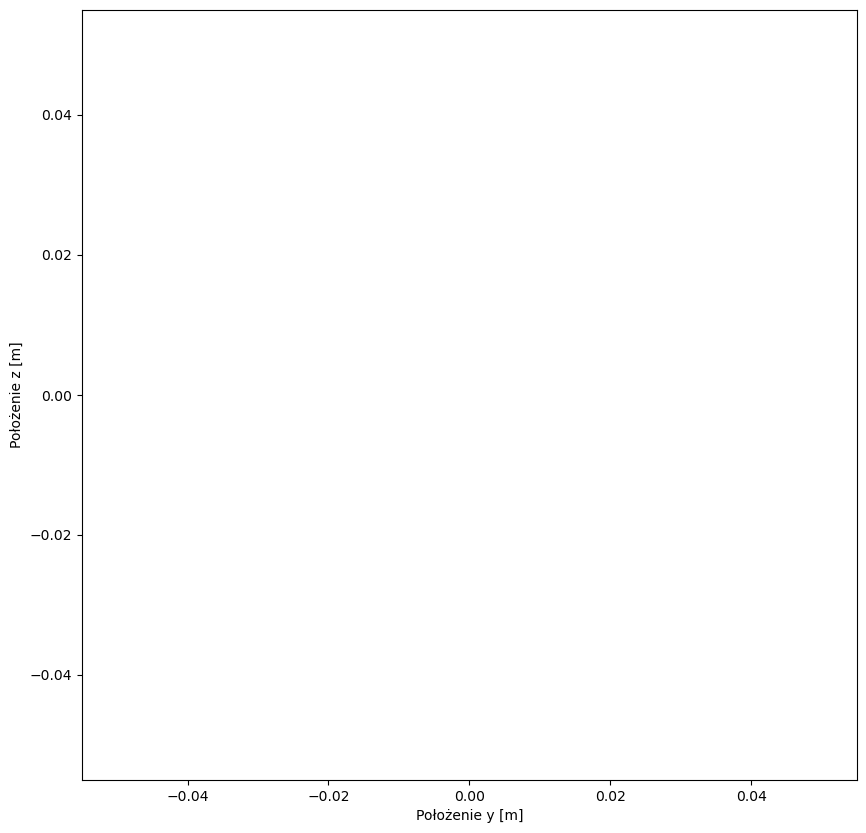

In [23]:
plt.plot()
plt.xlabel("Położenie y [m]")
plt.ylabel("Położenie z [m]")
plt.rcParams["figure.figsize"] = (10,10)

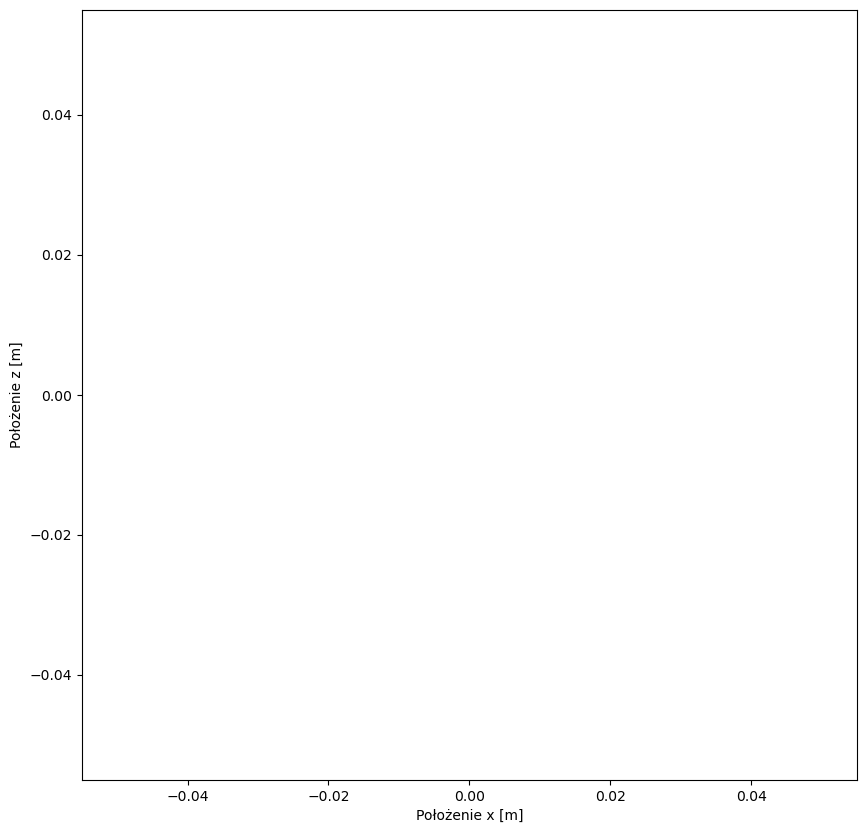

In [24]:
plt.plot()
plt.xlabel("Położenie x [m]")
plt.ylabel("Położenie z [m]")
plt.rcParams["figure.figsize"] = (10,10)

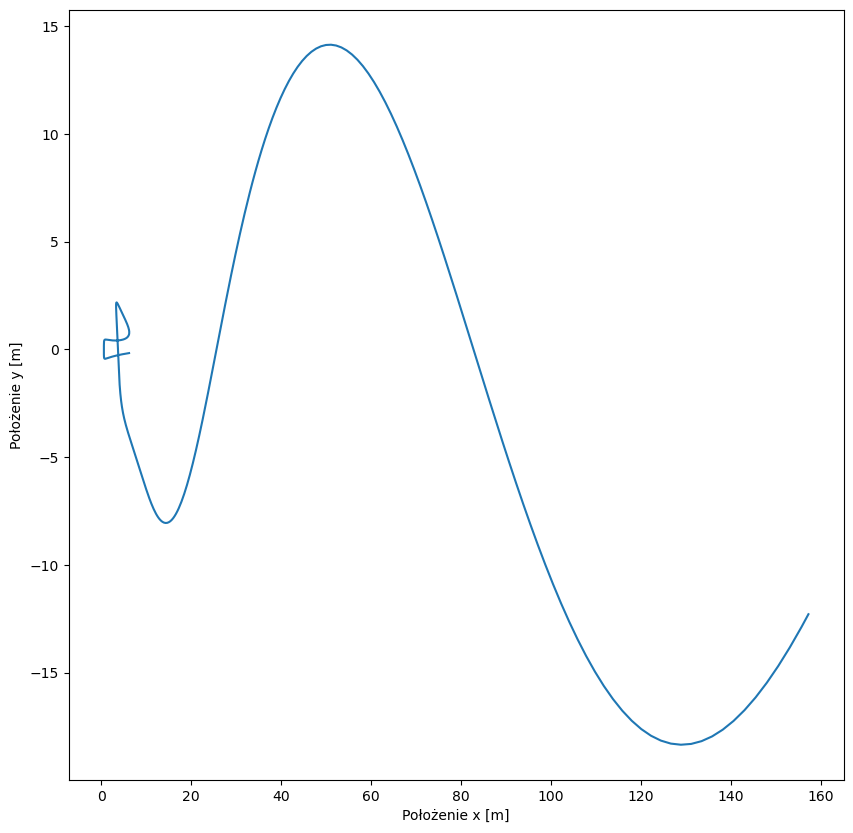

In [25]:
plt.plot(x_prim, y_prim)
plt.xlabel("Położenie x [m]")
plt.ylabel("Położenie y [m]")
plt.rcParams["figure.figsize"] = (10,10)